# Sentiment Analysis

## Introduction

So far, all of the analysis we've done has been pretty generic - looking at counts, creating scatter plots, etc. These techniques could be applied to numeric data as well.

When it comes to text data, there are a few popular techniques that we'll be going through in the next few notebooks, starting with sentiment analysis. A few key points to remember with sentiment analysis.

1. **TextBlob Module:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
2. **Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
   * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

For more info on how TextBlob coded up its [sentiment function](https://planspace.org/20150607-textblob_sentiment/).

Let's take a look at the sentiment of the various transcripts, both overall and throughout the comedy routine.

## Sentiment of Routine

In [1]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,transcript,full_name
ali,\n \n\n\n\n\n\nAli Wong: Baby Cobra (2016) | T...,Ali Wong
anthony,\n \n\n\n\n\n\nAnthony Jeselnik: Thoughts And ...,Anthony Jeselnik
bill,\n \n\n\n\n\n\nBILL BURR: I'M SORRY YOU FEEL T...,Bill Burr
bo,\n \n\n\n\n\n\nPage Not Found - Scraps from th...,Bo Burnham
dave,\n \n\n\n\n\n\nDave Chappelle: The Age of Spin...,Dave Chappelle
david,\n \n\n\n\n\n\nDavid Nihill: Cultural Apprecia...,Hasan Minhaj
hasan,\n \n\n\n\n\n\nPage Not Found - Scraps from th...,Jim Jefferies
jim,\n \n\n\n\n\n\nJIM JEFFERIES: BARE (2014) - Fu...,Joe Rogan
joe,\n \n\n\n\n\n\nJoe Rogan: Triggered (2016) - T...,John Mulaney
john,\n \n\n\n\n\n\nJohn Mulaney: The Comeback Kid ...,Louis C.K.


In [2]:
 pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob

from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,full_name,polarity,subjectivity
ali,\n \n\n\n\n\n\nAli Wong: Baby Cobra (2016) | T...,Ali Wong,0.072371,0.483764
anthony,\n \n\n\n\n\n\nAnthony Jeselnik: Thoughts And ...,Anthony Jeselnik,0.064069,0.555807
bill,\n \n\n\n\n\n\nBILL BURR: I'M SORRY YOU FEEL T...,Bill Burr,0.018043,0.537959
bo,\n \n\n\n\n\n\nPage Not Found - Scraps from th...,Bo Burnham,0.000000,0.000000
dave,\n \n\n\n\n\n\nDave Chappelle: The Age of Spin...,Dave Chappelle,0.001679,0.512749
david,\n \n\n\n\n\n\nDavid Nihill: Cultural Apprecia...,Hasan Minhaj,0.106783,0.438787
hasan,\n \n\n\n\n\n\nPage Not Found - Scraps from th...,Jim Jefferies,0.000000,0.000000
jim,\n \n\n\n\n\n\nJIM JEFFERIES: BARE (2014) - Fu...,Joe Rogan,0.047794,0.520735
joe,\n \n\n\n\n\n\nJoe Rogan: Triggered (2016) - T...,John Mulaney,0.042923,0.545846
john,\n \n\n\n\n\n\nJohn Mulaney: The Comeback Kid ...,Louis C.K.,0.084425,0.482007


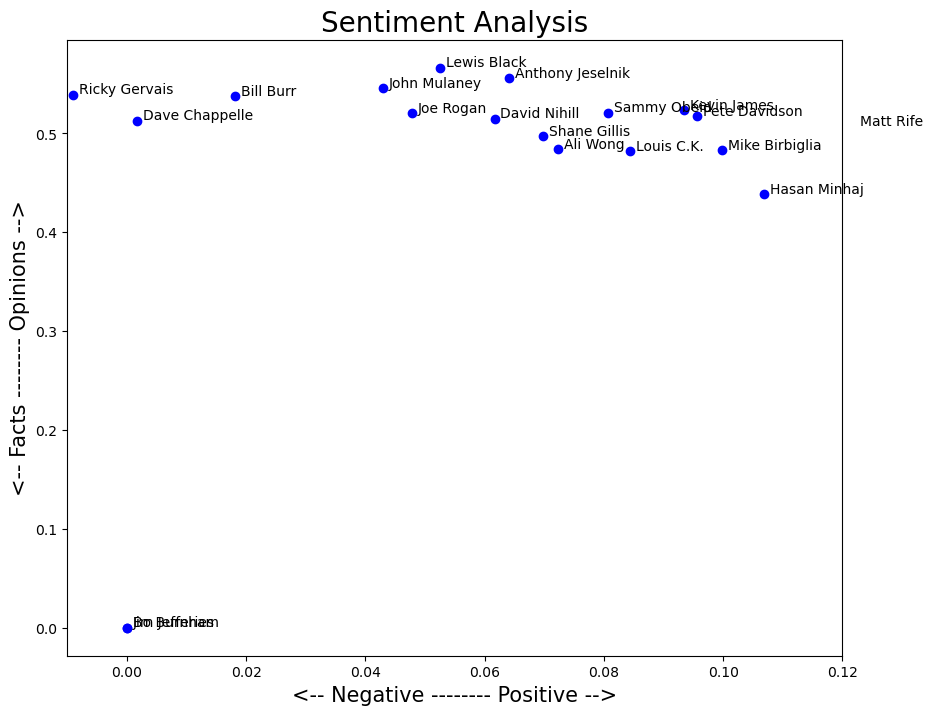

In [4]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10,8]

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

## Sentiment of Routine Over Time

Instead of looking at the overall sentiment, let's see if there's anything interesting about the sentiment over time throughout each routine.

In [5]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=7):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [6]:
# Let's take a look at our data again
data

,transcript,full_name,polarity,subjectivity
ali,\n \n\n\n\n\n\nAli Wong: Baby Cobra (2016) | T...,Ali Wong,0.072371,0.483764
anthony,\n \n\n\n\n\n\nAnthony Jeselnik: Thoughts And ...,Anthony Jeselnik,0.064069,0.555807
bill,\n \n\n\n\n\n\nBILL BURR: I'M SORRY YOU FEEL T...,Bill Burr,0.018043,0.537959
bo,\n \n\n\n\n\n\nPage Not Found - Scraps from th...,Bo Burnham,0.000000,0.000000
dave,\n \n\n\n\n\n\nDave Chappelle: The Age of Spin...,Dave Chappelle,0.001679,0.512749
david,\n \n\n\n\n\n\nDavid Nihill: Cultural Apprecia...,Hasan Minhaj,0.106783,0.438787
hasan,\n \n\n\n\n\n\nPage Not Found - Scraps from th...,Jim Jefferies,0.000000,0.000000
jim,\n \n\n\n\n\n\nJIM JEFFERIES: BARE (2014) - Fu...,Joe Rogan,0.047794,0.520735
joe,\n \n\n\n\n\n\nJoe Rogan: Triggered (2016) - T...,John Mulaney,0.042923,0.545846
john,\n \n\n\n\n\n\nJohn Mulaney: The Comeback Kid ...,Louis C.K.,0.084425,0.482007


In [7]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[["\n \n\n\n\n\n\nAli Wong: Baby Cobra (2016) | Transcript - Scraps from the loft\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n \n\n\n\n\n\n\r\n\t\tSkip to content\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES\n\nMOVIE REVIEWS\nMOVIE TRANSCRIPTS\nSTANLEY KUBRICK\n\n\nTV SERIES\n\nTV SHOW TRANSCRIPTS\n\n\nCOMEDY\n\nSTAND-UP COMEDY TRANSCRIPTS\nGEORGE CARLIN\nDAVE CHAPPELLE\n\n\nINTERVIEWS\n\nPLAYBOY INTERVIEWS\n\n\nMUSIC\nHISTORY\nBOOKS\n \n\n Menu\n\n\nMOVIES\n\nMOVIE REVIEWS\nMOVIE TRANSCRIPTS\nSTANLEY KUBRICK\n\n\nTV SERIES\n\nTV SHOW TRANSCRIPTS\n\n\nCOMEDY\n\nSTAND-UP COMEDY TRANSCRIPTS\nGEORGE CARLIN\nDAVE CHAPPELLE\n\n\nINTERVIEWS\n\nPLAYBOY INTERVIEWS\n\n\nMUSIC\nHISTORY\nBOOKS\n \n\n\n\n\n\n\n\nSearch\n\n Search\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\nMOVIES\n\nMOVIE REVIEWS\nMOVIE TRANSCRIPTS\nSTANLEY KUBRICK\n\n\nTV SERIES\n\nTV SHOW TRANSCRIP

In [8]:
# The list has 10 elements, one for each transcript
len(list_pieces)

19

In [9]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

7

In [10]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.10039317042606515,
  0.07236554168593004,
  0.08599046373599947,
  0.03555847481511543,
  0.06621169977478387,
  0.056448285510785484,
  0.09693515704154],
 [0.1463102913634829,
  -0.09862643502024034,
  0.050002902589109506,
  0.14794963627437852,
  0.09470077220077223,
  0.02457477069546034,
  0.14201682356444256],
 [-0.039352766798418995,
  0.032122595821225924,
  0.01920446451696449,
  -0.0003469967532467597,
  0.022777022152022108,
  -0.0136807666328943,
  0.09481182795698928],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [-0.02833840762412191,
  -0.028228296732202975,
  0.06104458188525091,
  0.02753874845392703,
  -0.06139707044140184,
  -0.07245469807969808,
  0.1262883141762452],
 [0.1394701624540334,
  0.10062145541796697,
  0.07331277056277054,
  0.10510572107630928,
  0.13058993050372356,
  0.11814416621302846,
  0.07852069569662161],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.10253542397256066,
  0.12625673308879412,
  -0.018344624940682005,
  -0.021309051398337105,
  0.14835

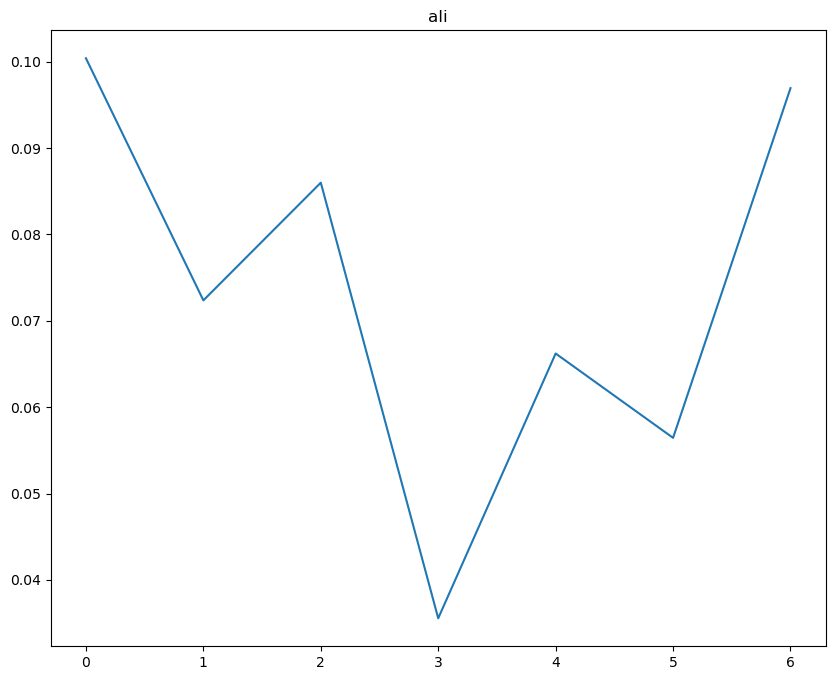

In [11]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

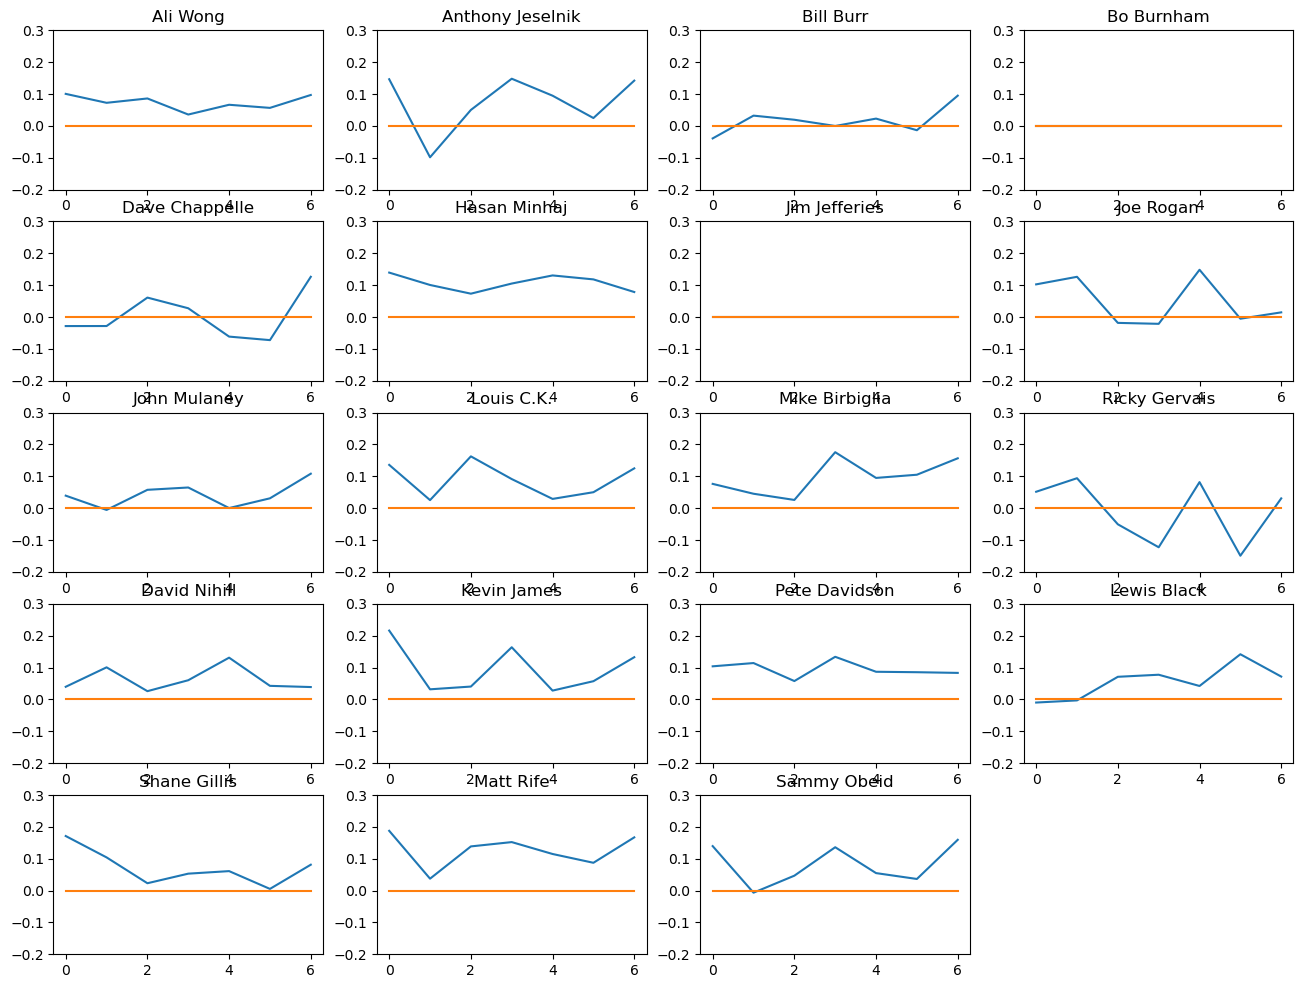

In [12]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(5, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,7), np.zeros(7))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

In [13]:
def classify_polarity(polarity):
    if polarity < 0:
        return 'Negative'
    elif polarity==0:
        return 'Neutral'
    else:
        return 'Positive'

def classify_subjectivity(subjectivity):
    if subjectivity < 0.5:
        return 'Objective'
    else:
        return 'Subjective'

# Add polarity and subjectivity classifications to DataFrame
data['polarity_class'] = data['polarity'].apply(classify_polarity)
data['subjectivity_class'] = data['subjectivity'].apply(classify_subjectivity)

### Assignments:
1. Classify all comedian accordig to Polarity and Subjectivity.
2. Modify the number of sections the comedy routine is split into and see how the charts over time change and again classify all comedian accordig to Polarity and Subjectivity.


In [14]:
import numpy as np
import math

def split_text(text, n=18):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [15]:
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[["\n \n\n\n\n\n\nAli Wong: Baby Cobra (2016) | Transcript - Scraps from the loft\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n \n\n\n\n\n\n\r\n\t\tSkip to content\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES\n\nMOVIE REVIEWS\nMOVIE TRANSCRIPTS\nSTANLEY KUBRICK\n\n\nTV SERIES\n\nTV SHOW TRANSCRIPTS\n\n\nCOMEDY\n\nSTAND-UP COMEDY TRANSCRIPTS\nGEORGE CARLIN\nDAVE CHAPPELLE\n\n\nINTERVIEWS\n\nPLAYBOY INTERVIEWS\n\n\nMUSIC\nHISTORY\nBOOKS\n \n\n Menu\n\n\nMOVIES\n\nMOVIE REVIEWS\nMOVIE TRANSCRIPTS\nSTANLEY KUBRICK\n\n\nTV SERIES\n\nTV SHOW TRANSCRIPTS\n\n\nCOMEDY\n\nSTAND-UP COMEDY TRANSCRIPTS\nGEORGE CARLIN\nDAVE CHAPPELLE\n\n\nINTERVIEWS\n\nPLAYBOY INTERVIEWS\n\n\nMUSIC\nHISTORY\nBOOKS\n \n\n\n\n\n\n\n\nSearch\n\n Search\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\nMOVIES\n\nMOVIE REVIEWS\nMOVIE TRANSCRIPTS\nSTANLEY KUBRICK\n\n\nTV SERIES\n\nTV SHOW TRANSCRIP

In [16]:
len(list_pieces[0])

18

In [17]:
polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.14945932539682538,
  0.1102721088435374,
  0.05731962481962481,
  0.04348765432098767,
  0.09585877085877086,
  0.08773198824984539,
  0.12484016754850089,
  -0.0037356321839080425,
  -0.05106547619047619,
  0.11190596486423468,
  0.17060443722943722,
  -0.010484307359307358,
  0.0628968253968254,
  0.12000000000000001,
  0.02635261656746032,
  0.04167133520074697,
  0.051091269841269826,
  0.20099206349206347],
 [0.1974962207105064,
  0.14294981060606052,
  0.0037166780587833373,
  -0.10699404761904763,
  -0.10225852752448499,
  0.14508928571428573,
  -0.00013440860215053625,
  0.11945707070707075,
  0.1565800865800866,
  0.08526244588744589,
  0.20052083333333337,
  0.062357142857142854,
  0.06464285714285711,
  -0.015639172335600908,
  -0.011865079365079351,
  0.04881068752036492,
  0.22270389075944635,
  0.19863945578231298],
 [0.016153816153816142,
  -0.0493523510032944,
  -0.023716931216931195,
  0.015489718614718623,
  0.06101995722531437,
  0.0005418301316738715,
  0.034157

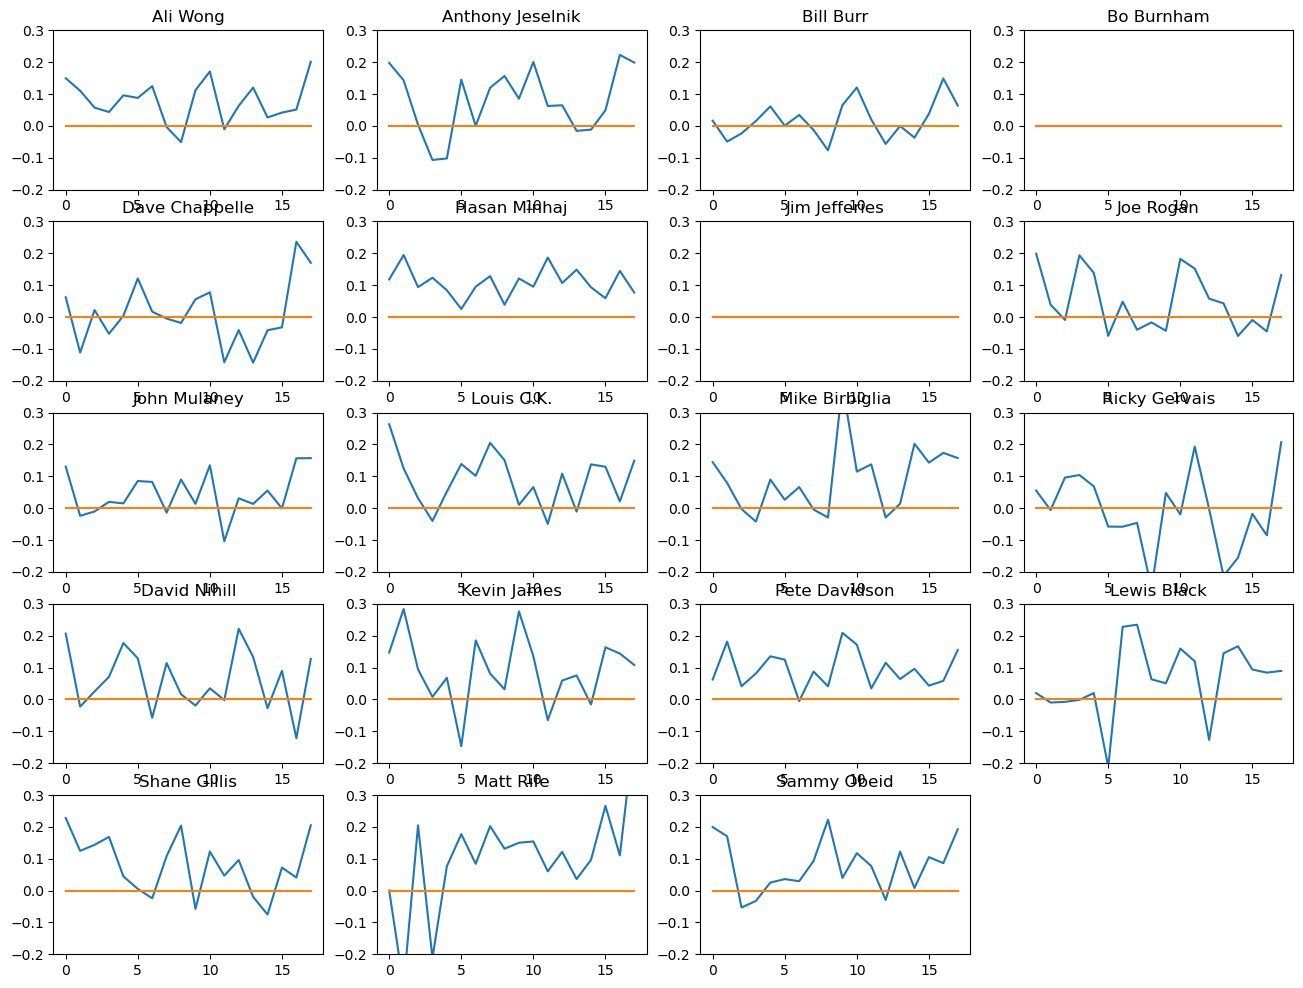

In [18]:
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(5, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,18), np.zeros(18))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()